In [287]:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pathlib

In [18]:


def get_run_dataframe(algorithm, run_id, mimic_run_id):
    
    if mimic_run_id == 0:
        mimic_run_id = run_id

    rhc_01 = pd.read_csv(f"../output/{algorithm}/{run_id}/RHC/00.csv")
    sa_01 = pd.read_csv(f"../output/{algorithm}/{run_id}/SA/00.csv")
    ga_01 = pd.read_csv(f"../output/{algorithm}/{run_id}/GA/00.csv")
    mimic_01 = pd.read_csv(f"../output/{algorithm}/{mimic_run_id}/MIMIC/00.csv")

    all_df =  pd.DataFrame()
    iteration = rhc_01['iteration']
    mimc_iteration = mimic_01['iteration']
    loop_cnt =1

    # f_rhc = rhc_01['fitness']
    # f_sa = sa_01['fitness']
    # f_ga = ga_01['fitness']
    # f_mimic = mimic_01['fitness']

    all_df['fit_rhc'], all_df['fit_sa'],all_df['fit_ga'],all_df['fit_mimic'] = [rhc_01['fitness'], sa_01['fitness'],ga_01['fitness'],mimic_01['fitness']]
    all_df['fe_rhc'], all_df['fe_sa'],all_df['fe_ga'],all_df['fe_mimic'] = [rhc_01['feval'], sa_01['feval'],ga_01['feval'],mimic_01['feval']]
    all_df['tt_rhc'], all_df['tt_sa'],all_df['tt_ga'],all_df['tt_mimic'] = [rhc_01['trainingtime'], sa_01['trainingtime'],ga_01['trainingtime'],mimic_01['trainingtime']]

    for i in range(1,5):
        
        rhc_string = f"../output/{algorithm}/{run_id}/RHC/{i:02d}.csv"
        rhc_file = pathlib.Path(rhc_string)
        if not rhc_file.exists():
            print('FILLE DONT EXIST!')
            break
        
        rhc = pd.read_csv(rhc_string)
        sa = pd.read_csv(f"../output/{algorithm}/{run_id}/SA/{i:02d}.csv")
        ga = pd.read_csv(f"../output/{algorithm}/{run_id}/GA/{i:02d}.csv")
        mimic = pd.read_csv(f"../output/{algorithm}/{mimic_run_id}/MIMIC/{i:02d}.csv")

        all_df['fit_rhc'] = all_df['fit_rhc'] +rhc['fitness']
        all_df['fit_sa']= all_df['fit_sa']+sa['fitness']
        all_df['fit_ga'] = all_df['fit_ga']+ga['fitness']
        all_df['fit_mimic'] =all_df['fit_mimic']+mimic['fitness']

        all_df['fe_rhc'] = all_df['fe_rhc'] +rhc['feval']
        all_df['fe_sa']= all_df['fe_sa']+sa['feval']
        all_df['fe_sa'] = all_df['fe_sa']+ga['feval']
        all_df['fe_mimic'] =all_df['fe_mimic']+mimic['feval']

        all_df['tt_rhc'] = all_df['tt_rhc'] +rhc['trainingtime']
        all_df['tt_sa']= all_df['tt_sa']+sa['trainingtime']
        all_df['tt_ga'] = all_df['tt_ga']+ga['trainingtime']
        all_df['tt_mimic'] =all_df['tt_mimic']+mimic['trainingtime']
        loop_cnt += 1


    all_df = all_df /loop_cnt
    all_df.insert(0,'it',iteration)
    all_df.insert(1,'m_it',mimc_iteration)
    return all_df

# all_df

In [414]:
def plot_all_generic(all_df, title):
    
    figsave=False
    
    fig = plt.figure(figsize=[7,5])
    ax1 = fig.add_subplot(111); 
#     ax2 = fig.add_subplot(132);
#     ax3 = fig.add_subplot(122)

    ax1.plot(all_df['it'], all_df['fit_rhc'], label='RHC' )
    ax1.plot(all_df['it'], all_df['fit_sa'], label='SA')
    ax1.plot(all_df['it'], all_df['fit_ga'], label='GA')
    ax1.plot(all_df['m_it'], all_df['fit_mimic'], label='MIMIC')
    ax1.legend(); ax1.set_ylabel("Fitness"); ax1.set_xlabel("interval")
#     ax1.set_title('FlipFlop Fitness 1K bit pattern')
#     ax1.set_xlim([-1,12000])
    ax1.set_title('Fitness %s '%title)

#     ax2.plot(all_df['it'], all_df['fe_rhc'], label='RHC')
#     ax2.plot(all_df['it'], all_df['fe_sa'], label='SA')
#     ax2.plot(all_df['it'], all_df['fe_ga'], label='GA')
#     ax2.plot(all_df['m_it'], all_df['fe_mimic'], label='MIMIC',linewidth=1.75)
#     ax2.legend(); ax2.set_ylabel("Function Evals"); ax2.set_xlabel("interval")
#     ax2.set_title('Function evals, %s'%title)

#     ax3.plot(all_df['it'], all_df['tt_rhc'], label='RHC', linewidth=0.75)
#     ax3.plot(all_df['it'], all_df['tt_sa'], label='SA', linewidth=0.75)
#     ax3.plot(all_df['it'], all_df['tt_ga'], label='GA', linewidth=0.75)
#     ax3.plot(all_df['m_it'], all_df['tt_mimic'], label='MIMIC', linewidth=0.75)
#     ax3.legend(); ax3.set_ylabel("Training Time (sec)"); ax3.set_xlabel("interval")
#     ax3.set_title('Training Time/Interval, %s'% title)
#     ax3.set_xlim([-1,3000])
    if figsave:
        fig.savefig('plots/%s_results.png'%title,bbox_inches='tight')
        plt.close(fig=fig)
    else:
        plt.show()

In [423]:
def fourpeak_stats_print(all_df):
    
    wall_multiplier_mimic = 5;
    wall_multiplier = 25
#     fdivider = 
    
    
    for alg in (['rhc','sa','ga','mimic']):    
        mean_fevals = all_df[f'fe_%s'%alg].iloc[-1].value()
        wall_clock_sum = all_df[f'tt_%s'%alg].sum()
        if alg == 'mimic':
            wall_clock_sum *= wall_multiplier_mimic
        else:
            wall_clock_sum *= wall_multiplier
            
        print (f'{alg} Sum fevals: {mean_fevals:10f}')
        print (f'{alg} Wall Clock Time: {wall_clock_sum:10f}')

def plot_runs(algorithm, title, run_list, mimic_id):
    for run_id in run_list:
        meta_file = open(f"../output/{algorithm}/{run_id}.txt","r+")
        print(meta_file.read())
        all_df = get_run_dataframe(algorithm, run_id, mimic_id)
        fourpeak_stats_print(all_df)
        plot_all_generic(all_df, title)
        

# Original Flip flop plots
# plot_runs('flipflop', "Flip Flop", [14095151,14095353,14100202,14103939,14104040],14100202)

# plot_runs('flipflop', "Flip Flop",[17210909,17212828,17213030,17213131,17213232,17213737],17210909)

plot_runs('flipflop', "Flip Flop",[17213232,17214444],17214444)

#FourPeaks
# plot_runs('fourpeaks', "Four Peaks", [14170505,14170707,15085757,15095050,15100202,15100404,15101212,15101717,17185454,17200909,17203232], 0)

#notes on 4peaks above:
#. 1. Increasing iteration cut off to 10,000 made GA & friends get better results over 5,000
#  2. Changing of the problem space to 100/10 for four peaks makes GA work as seen in paper from Isbel
#  3. swithcing back to 200/20, then GA starts to loose to RHC, 

#Four Peaks main run 17185454
# plot_runs('fourpeaks', "Four Peaks", [17200909], 0)

#Four peaks mimic winn 17191010


       RunId: 17213232   Run time: 2021.10.17.21.32.49 
FlipFlow bit size: 1000
SA temp:1,000,000,000,000.000 cooling:0.990
GA pop:200, mate:100, mutate:10
MIMIC samp_size:100, to_keep:20 



AttributeError: 'numpy.float64' object has no attribute 'value'

In [26]:
ones_a = np.ones(5)
ones_b = np.ones(10)
ones_c= np.ones(7)

df_test_a = pd.DataFrame({'a':ones_a})
df_test_b = pd.DataFrame({'b':ones_b})
df_test_a.rename(columns={'a':'a2'}, inplace=True)

df_test = pd.concat([df_test_a, df_test_b], axis=1)
df_test

,a2,b
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,NaN,1.0
6,NaN,1.0
7,NaN,1.0
8,NaN,1.0
9,NaN,1.0


In [118]:

def rename_concat_four(pb_df, rhc_df, sa_df, ga_df, index):
    pb_df.rename(columns={'loss':'loss_bp_%02d'%index}, inplace=True)
    rhc_df.rename(columns={'loss':'loss_rhc_%02d'%index}, inplace=True)
    sa_df.rename(columns={'loss':'loss_sa_%02d'%index}, inplace=True)
    ga_df.rename(columns={'loss':'loss_ga_%02d'%index}, inplace=True)
    big_df  = pd.concat([pb_df, rhc_df, sa_df, ga_df], axis=1)
    return big_df.drop(columns=['interval'])

    

def get_nn_dataframe(run_id):
    
#     bp_01 = pd.read_csv(f"../output/NN/{run_id}/BP/00.csv")
#     rhc_01 = pd.read_csv(f"../output/NN/{run_id}/RHC/00.csv")
#     sa_01 = pd.read_csv(f"../output/NN/{run_id}/SA/00.csv")
#     ga_01 = pd.read_csv(f"../output/NN/{run_id}/GA/00.csv")
    

#     all_df =  pd.DataFrame()
   
    loop_cnt =0


#     all_df['loss_bp'],all_df['loss_rhc'], all_df['loss_sa'],all_df['loss_ga'], = [bp_01['loss'],rhc_01['loss'], sa_01['loss'],ga_01['loss']]
    

    all_df_list = []
    for i in range(0,5):
        
        bp_string = f"../output/NN/{run_id}/BP/{i:02d}.csv"
        rhc_file = pathlib.Path(bp_string)
        if not rhc_file.exists():
            print('FILLE DONT EXIST!')
            break
        bp = pd.read_csv(bp_string)
        rhc = pd.read_csv(f"../output/NN/{run_id}/RHC/{i:02d}.csv")
        sa = pd.read_csv(f"../output/NN/{run_id}/SA/{i:02d}.csv")
        ga = pd.read_csv(f"../output/NN/{run_id}/GA/{i:02d}.csv")
        all_df_list.append(rename_concat_four(bp,rhc,sa,ga, i))
       

        loop_cnt += 1
            

    huge_df = pd.concat(all_df_list, axis=1)
    huge_df = huge_df.ffill()
#     print(huge_df.head(10))
    
    all_df =  pd.DataFrame()
    all_df['loss_bp'],all_df['loss_rhc'], all_df['loss_sa'],all_df['loss_ga'], = huge_df['loss_bp_00'],huge_df['loss_rhc_00'], huge_df['loss_sa_00'],huge_df['loss_ga_00']
    for i in range(1, loop_cnt):
        for ro in ['bp','rhc','sa','ga']:
            all_df[f'loss_{ro}'] = all_df[f'loss_{ro}'] +huge_df[f'loss_{ro}_{i:02d}']
            if ro == 'bp':
                print(f"{ro}", huge_df[f'loss_{ro}_{i:02d}'].iloc[0], all_df[f'loss_{ro}'].iloc[0])
            

    all_df = all_df /loop_cnt
#     all_df.insert(0,'it',iteration)
#     all_df.insert(1,'m_it',mimc_iteration)
    return all_df, huge_df


In [349]:
def plot_all_nn(all_df):
    figsave=True
    
    fig = plt.figure(figsize=[15,5])
    ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122);# ax3 = fig.add_subplot(143); ax4 = fig.add_subplot(143)

    ax1.plot(all_df.index.values, all_df['loss_bp'], label='Back Prop' )
    ax1.legend(); ax1.set_ylabel("loss (SSE)"); ax1.set_xlabel("interval")
    ax1.set_xscale('log')
    ax1.set_title('Loss Curve for Back Propagation with Gradient Descent ')
    
    ax2.plot(all_df.index.values, all_df['loss_rhc'], label='RHC' )
    ax2.plot(all_df.index.values, all_df['loss_sa'], label='SA' )
    ax2.plot(all_df.index.values, all_df['loss_ga'], label='GA' )
    ax2.legend(); ax2.set_ylabel("loss (MSE)"); ax2.set_xlabel("interval")
    ax2.set_xscale('log')
    ax2.set_title('Loss Curve all Random Optimizers ')
    
    if figsave:
        fig.savefig('plots/nn_results.png',bbox_inches='tight')
        plt.close(fig=fig)
    else:
        plt.show()

    plt.show()
    
    
def plot_all_nn_huge(all_df):
    
    fig = plt.figure(figsize=[20,2])
    
    for i in range(5):        
        ax1 = fig.add_subplot(1,5,i+1)
        ax1.plot(all_df.index.values, all_df[f'loss_bp_{i:02d}'], label=f'Back Prop Run-{i}' )
        if i == 0:
            ax1.set_ylabel("loss (SSE)");
        ax1.legend();  ax1.set_xlabel("interval")
        ax1.set_xscale('log')
        ax1.set_title(f'Back Prop Run-{i}')
    plt.show()
    
    fig = plt.figure(figsize=[20,2])
    for i in range(5):        
        ax2 = fig.add_subplot(1,5,i+1)
        ax2.plot(all_df.index.values, all_df[f'loss_rhc_{i:02d}'], label='RHC' )
        ax2.plot(all_df.index.values, all_df[f'loss_sa_{i:02d}'], label='SA' )
        ax2.plot(all_df.index.values, all_df[f'loss_ga_{i:02d}'], label='GA' )
        if i == 0:
            ax2.set_ylabel("loss (MSE)");
        ax2.legend();  ax2.set_xlabel("interval")
        ax2.set_xscale('log')
        ax2.set_title(f'Optimizers Run-{i}')
    plt.show()



In [345]:
#First result with full test data and good convervence 16130707

df_nn_loss, df_huge = get_nn_dataframe(16130707)
    
df_nn_loss



bp 0.1732509334197711 0.6508539524028373
bp 0.0230957260516564 0.6739496784544937
bp 0.0224232049363351 0.6963728833908288
bp 0.1382083359315166 0.8345812193223454


,loss_bp,loss_rhc,loss_sa,loss_ga
0,0.166916,352.713892,159.219016,124.088604
1,0.102301,351.424304,159.405771,36.013794
2,0.095183,351.414808,155.918734,27.304617
3,0.121829,350.464240,155.927775,30.531111
4,0.062497,350.460153,155.580423,37.338086
...,...,...,...,...
995,0.017260,22.873015,23.363596,23.375012
996,0.017260,22.864862,23.363596,23.375012
997,0.017260,22.866801,23.363596,23.375012
998,0.017260,22.881726,23.363596,23.375012


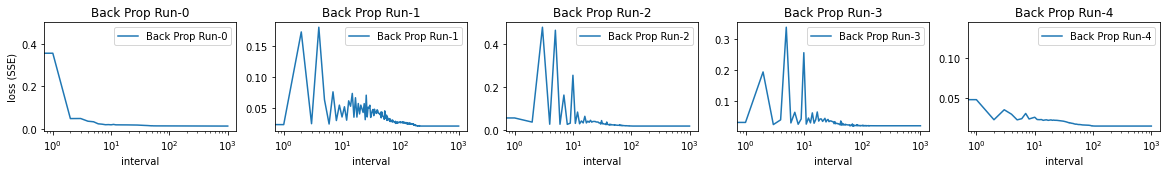

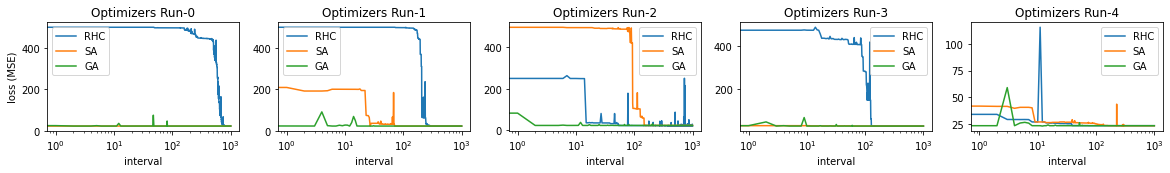

In [350]:
#Notes on results:
'''
The run 16130707

Recall AVG: BP: 0.54251,  RHC: 1.00000, SA: 1.00000,  FA: 1.00000,   
Train Time AVG: BP: 1.03359,  RHC: 15.19220, SA: 6.16444,  FA: 60.53671,


RUn 16222121  ** Checked against actual trainign data to get good Recall!**
Recall AVG: BP: 0.55669,  RHC: 0.60000, SA: 0.80000,  FA: 0.60000,   
Train Time AVG: BP: 1.06599,  RHC: 14.67515, SA: 6.09482,  FA: 33.96080, 

train:(16699, 16), test:(7157, 16)
'''



plot_all_nn(df_nn_loss)
plot_all_nn_huge(df_huge)

In [172]:

def get_kcolor_dataframe(run_id, algorithm='kcolor' ):
    


    rhc_01 = pd.read_csv(f"../output/{algorithm}/{run_id}/RHC/00.csv")
    sa_01 = pd.read_csv(f"../output/{algorithm}/{run_id}/SA/00.csv")
    ga_01 = pd.read_csv(f"../output/{algorithm}/{run_id}/GA/00.csv")
    mimic_01 = pd.read_csv(f"../output/{algorithm}/{run_id}/MIMIC/00.csv")

    all_df =  pd.DataFrame()
    

    all_df['fit_rhc'], all_df['fit_sa'],all_df['fit_ga'],all_df['fit_mimic'] = [rhc_01['fitness'], sa_01['fitness'],ga_01['fitness'],mimic_01['fitness']]
    all_df['fe_rhc'], all_df['fe_sa'],all_df['fe_ga'],all_df['fe_mimic'] = [rhc_01['feval'], sa_01['feval'],ga_01['feval'],mimic_01['feval']]
    all_df['tt_rhc'], all_df['tt_sa'],all_df['tt_ga'],all_df['tt_mimic'] = [rhc_01['trainingtime'], sa_01['trainingtime'],ga_01['trainingtime'],mimic_01['trainingtime']]
    
    return all_df;


In [341]:
def plot_all_kcolor_bar(all_df):
    
    
    fig = plt.figure(figsize=[20,2])
    
    num_bins = 12;
    index =0
    
    for alg in (['rhc','sa','ga','mimic']):        
        ax1 = fig.add_subplot(1,4,index+1)
        labels, counts = np.unique(all_df[f'fit_%s'%alg], return_counts=True)
        ax1.bar(labels, counts, align='center')
        ax1.set_xticks(labels)
        ax1.set_xlim([0, num_bins])
#         ax1.hist(all_df[f'fit_%s'%alg], num_bins, density=False )
        
      
        ax1.set_ylabel("Count")
        ax1.set_xlabel("Fitness")
        ax1.set_title(f'%s Fitness KColor  (10 is perfect coloring)'%alg.upper())
        index +=1
    plt.show()
    
def plot_single_kcolor_bar(all_df, run_id):
    figsave=False
       
    num_bins = 11;
    ind = np.arange(num_bins); width = 0.15
    fig = plt.figure(figsize=[5,3])
    axs = fig.add_subplot(111)
    
    index =0
    for alg in (['rhc','sa','ga','mimic']):
        labels, counts = np.unique(all_df[f'fit_%s'%alg], return_counts=True)
        axs.bar(labels+ (index*width), counts, width=width, label=f'{alg.upper()}', align='center')
#         ax1.set_xticks(labels)
        index +=1
    
#     axs.set_xticks(ind + width / 2)

#     print("ind:",ind)
    axs.set_xticks(ind + (width*3) / 2)
    axs.set_xticklabels( ind )
#     axs.set_xlim([-0.1,4])
    axs.xaxis.set_minor_locator(AutoMinorLocator(2))
    axs.tick_params(which='minor', length=10, color='r')
                        
#     axs.set_xticks(ind + width)
    axs.legend(); axs.set_ylabel("Count",fontsize=11); axs.set_xlabel('Fitness',fontsize=12)
    axs.set_title(f'K-Coloring Fitness\n 4-Regular graph,K=3\n MIMIC-focused tuning',fontsize=13)
#      axs.set_title(f'K-Coloring Fitness\n 4-Regular graph,K=3\n Initial tuning',fontsize=13)
    
    if figsave:
        fig.savefig('plots/kcolor_%d.png'%run_id,bbox_inches='tight')
        plt.close(fig=fig)
    else:
        plt.show()
    

       RunId: 16201616   Run time: 2021.10.16.20.16.41 
KColoring  K=3   GraphType: WikiEdges  SAMPLES: 200
SA temp:1,000,000,000,000.000 cooling:0.100 training iterations: 200000
GA crossover strategy: , mutation strategy 
GA pop:200, mate:100, mutate:20
MIMIC samp_size:100, to_keep:10 

rhc Mean fevals: 200002.000000
rhc Wall Clock Time:   2.595946
sa Mean fevals: 200002.000000
sa Wall Clock Time:   3.252690
ga Mean fevals: 5676.370000
ga Wall Clock Time:   0.483852
mimic Mean fevals: 1101.000000
mimic Wall Clock Time:   0.216176


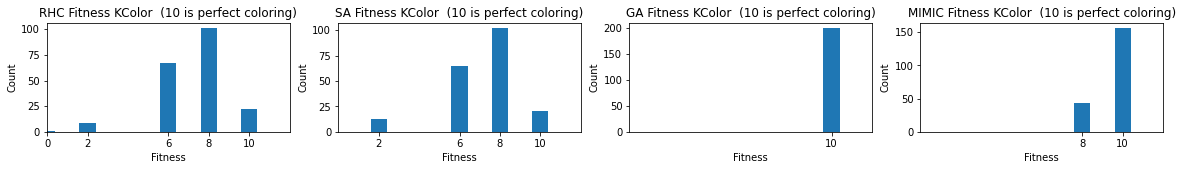

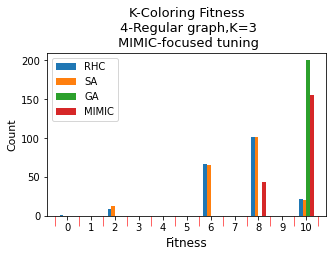

       RunId: 16201717   Run time: 2021.10.16.20.17.47 
KColoring  K=3   GraphType: Zachary  SAMPLES: 200
SA temp:1,000,000,000,000.000 cooling:0.100 training iterations: 200000
GA crossover strategy: , mutation strategy 
GA pop:200, mate:100, mutate:20
MIMIC samp_size:100, to_keep:10 

rhc Mean fevals: 200002.000000
rhc Wall Clock Time:   4.588647
sa Mean fevals: 200002.000000
sa Wall Clock Time:   4.967250
ga Mean fevals: 5677.250000
ga Wall Clock Time:   0.384587
mimic Mean fevals: 1101.000000
mimic Wall Clock Time:   1.409515


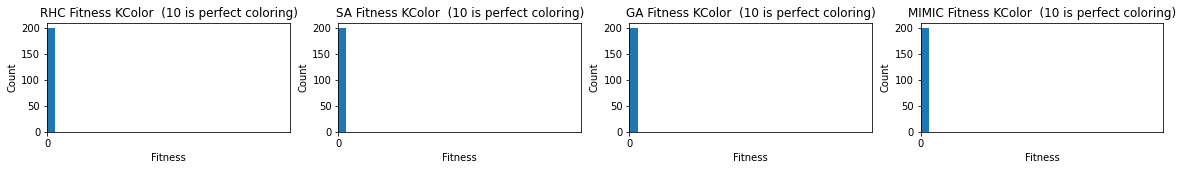

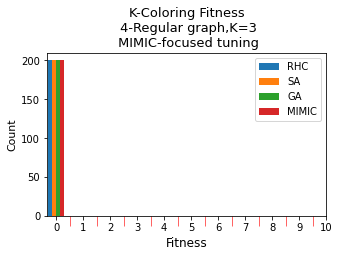

       RunId: 16202020   Run time: 2021.10.16.20.20.32 
KColoring  K=3   GraphType: WikiEdges  SAMPLES: 200
SA temp:1,000,000,000,000.000 cooling:0.950 training iterations: 200000
GA crossover strategy: , mutation strategy 
GA pop:200, mate:100, mutate:20
MIMIC samp_size:100, to_keep:10 

rhc Mean fevals: 200002.000000
rhc Wall Clock Time:   2.694507
sa Mean fevals: 200002.000000
sa Wall Clock Time:   5.981038
ga Mean fevals: 5677.350000
ga Wall Clock Time:   0.435037
mimic Mean fevals: 1101.000000
mimic Wall Clock Time:   0.220728


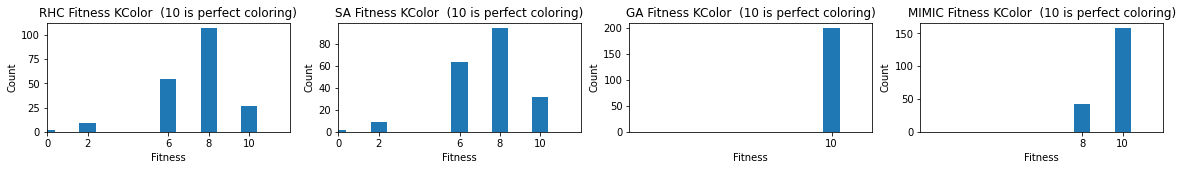

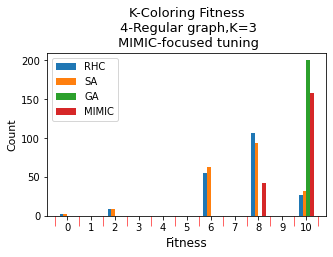

       RunId: 16202222   Run time: 2021.10.16.20.22.55 
KColoring  K=3   GraphType: WikiEdges  SAMPLES: 200
SA temp:1,000,000,000,000.000 cooling:0.950 training iterations: 200000
GA crossover strategy: , mutation strategy 
GA pop:200, mate:100, mutate:20  iterations: 50
MIMIC samp_size:100, to_keep:10  iterations: 200

rhc Mean fevals: 200002.000000
rhc Wall Clock Time:   2.580565
sa Mean fevals: 200002.000000
sa Wall Clock Time:   5.738950
ga Mean fevals: 5678.425000
ga Wall Clock Time:   0.389020
mimic Mean fevals: 20101.000000
mimic Wall Clock Time:   2.034006


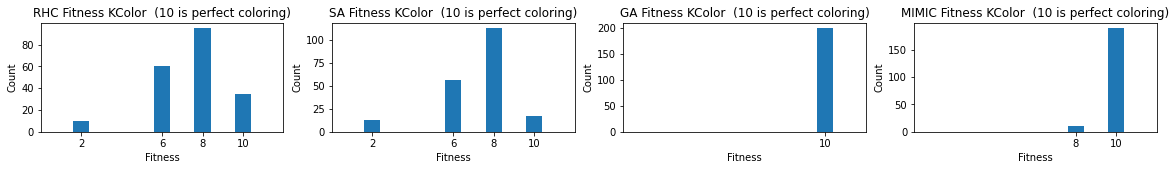

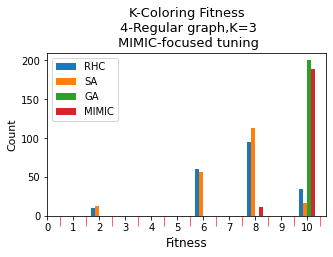

       RunId: 16202525   Run time: 2021.10.16.20.25.50 
KColoring  K=3   GraphType: WikiEdges  SAMPLES: 200
SA temp:1,000,000,000,000.000 cooling:0.950 training iterations: 200000
GA crossover strategy: , mutation strategy 
GA pop:200, mate:100, mutate:20  iterations: 50
MIMIC samp_size:200, to_keep:5  iterations: 200

rhc Mean fevals: 200002.000000
rhc Wall Clock Time:   2.718323
sa Mean fevals: 200002.000000
sa Wall Clock Time:   5.714418
ga Mean fevals: 5677.540000
ga Wall Clock Time:   0.392800
mimic Mean fevals: 40201.000000
mimic Wall Clock Time:   3.620669


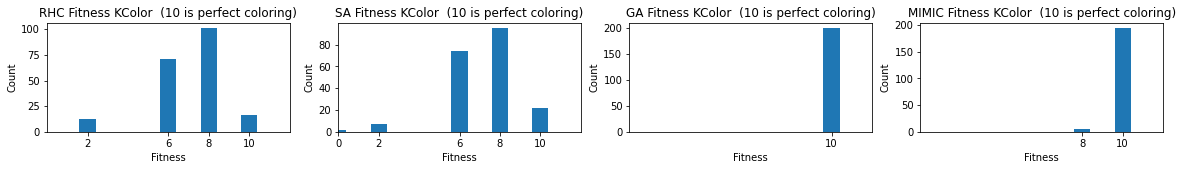

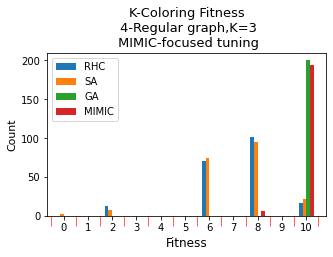

       RunId: 16204040   Run time: 2021.10.16.20.40.24 
KColoring  K=3   GraphType: WikiEdges  SAMPLES: 200
SA temp:1,000,000,000,000.000 cooling:0.950 training iterations: 200000
GA crossover strategy: , mutation strategy 
GA pop:200, mate:100, mutate:20  iterations: 50
MIMIC samp_size:200, to_keep:5  iterations: 20

rhc Mean fevals: 200002.000000
rhc Wall Clock Time:   2.720159
sa Mean fevals: 200002.000000
sa Wall Clock Time:   5.885877
ga Mean fevals: 5677.710000
ga Wall Clock Time:   0.434941
mimic Mean fevals: 4201.000000
mimic Wall Clock Time:   0.502143


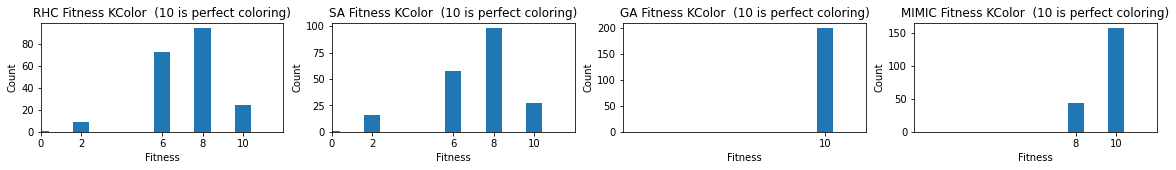

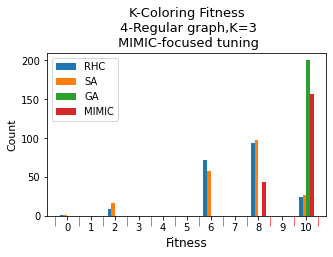

       RunId: 17132626   Run time: 2021.10.17.13.26.58 
KColoring  K=4   GraphType: WikiEdges  SAMPLES: 200
SA temp:1,000,000,000,000.000 cooling:0.950 training iterations: 200000
GA crossover strategy: , mutation strategy 
GA pop:200, mate:100, mutate:20  iterations: 50
MIMIC samp_size:200, to_keep:5  iterations: 20

rhc Mean fevals: 200002.000000
rhc Wall Clock Time:   2.628882
sa Mean fevals: 200002.000000
sa Wall Clock Time:   6.065250
ga Mean fevals: 5679.195000
ga Wall Clock Time:   0.411611
mimic Mean fevals: 4201.000000
mimic Wall Clock Time:   0.545076


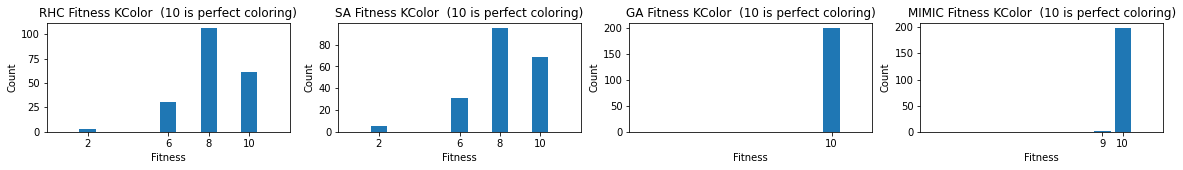

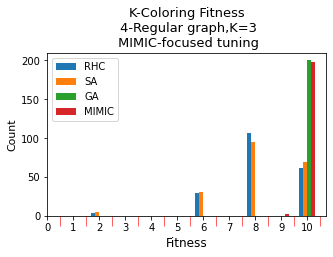

       RunId: 17133333   Run time: 2021.10.17.13.33.31 
KColoring  K=6   GraphType: WikiEdges  SAMPLES: 200
SA temp:1,000,000,000,000.000 cooling:0.950 training iterations: 200000
GA crossover strategy: , mutation strategy 
GA pop:200, mate:100, mutate:20  iterations: 50
MIMIC samp_size:200, to_keep:5  iterations: 10

rhc Mean fevals: 200002.000000
rhc Wall Clock Time:   2.548254
sa Mean fevals: 200002.000000
sa Wall Clock Time:   5.919316
ga Mean fevals: 5678.750000
ga Wall Clock Time:   0.437068
mimic Mean fevals: 2201.000000
mimic Wall Clock Time:   0.332195


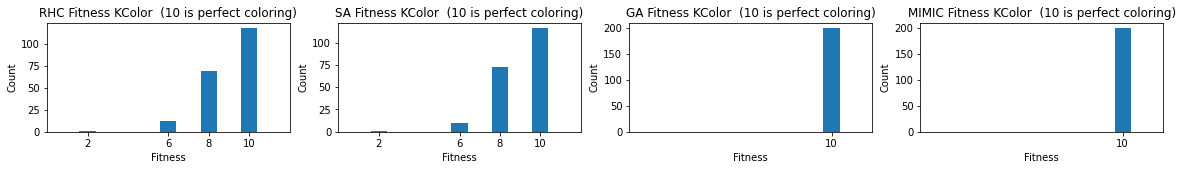

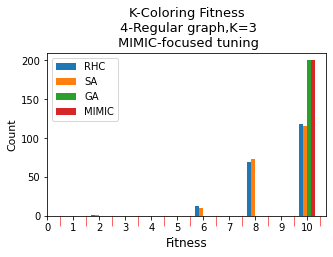

       RunId: 17151313   Run time: 2021.10.17.15.13.39 
KColoring  K=3   GraphType: WikiEdges  SAMPLES: 200
SA temp:1,000,000,000,000.000 cooling:0.950 training iterations: 200000
GA crossover strategy: , mutation strategy 
GA pop:100, mate:20, mutate:60  iterations: 50
MIMIC samp_size:200, to_keep:5  iterations: 10

rhc Mean fevals: 200002.000000
rhc Wall Clock Time:   2.753378
sa Mean fevals: 200002.000000
sa Wall Clock Time:   6.044623
ga Mean fevals: 2913.280000
ga Wall Clock Time:   0.252560
mimic Mean fevals: 2201.000000
mimic Wall Clock Time:   0.331071


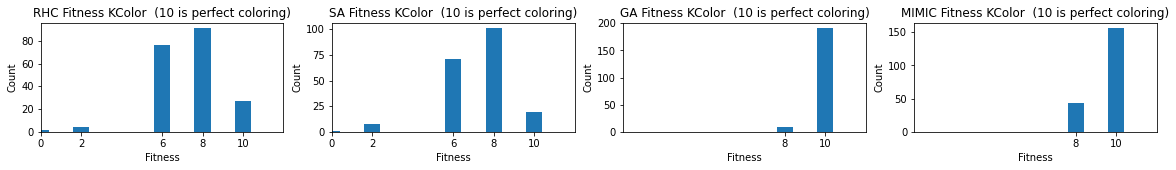

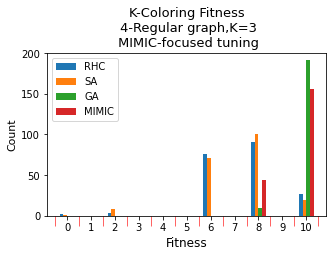

In [344]:
kcolor_df = get_kcolor_dataframe(16204040)
kcolor_df

def kcolor_stats_print(all_df):
    df = pd.DataFrame()
    
    for alg in (['rhc','sa','ga','mimic']):    
        mean_fevals = all_df[f'fe_%s'%alg].mean()
        wall_clock_sum = all_df[f'tt_%s'%alg].sum()
        print (f'{alg} Mean fevals: {mean_fevals:10f}')
        print (f'{alg} Wall Clock Time: {wall_clock_sum:10f}')


def plot_kcolor_runs( run_list):
    for run_id in run_list:
        meta_file = open(f"../output/kcolor/{run_id}_meta.txt","r+")
        print(meta_file.read())
        all_df = get_kcolor_dataframe(run_id)
        kcolor_stats_print(all_df)
        plot_all_kcolor_bar(all_df)
        print('')
        plot_single_kcolor_bar(all_df, run_id)
        
# plot_kcolor_runs( [16194242,16200404,16201515,16201616,16201717,16202020])

'''
NOTES for K-color
1. given the problem space, it is hard to show convergence, but one way to show is to produce a distribution of counts, as convergence
   proceeed the, the distribution will arrive at a the same bar chart given an appoproate amount of training interations

'''

plot_kcolor_runs([16201616,16201717,16202020,16202222,16202525,16204040,17132626,17133333,17151313])

# plot_kcolor_runs([16202525])
#Super easy, wiki with k=6 17133333
#Zachery = 16201717
#Mimic lowest func interations: 16202020
#Mimic Highest tuning: 16202525